In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("large_movies_data_with_details.csv")
print("Step 1: Dataset Loaded")
df.head()

Step 1: Dataset Loaded


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,homepage,imdb_id,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline
0,False,/zxxIzU6XjzTQKS9pPeLmYTDTFL1.jpg,"[35, 80]",209189,en,Life of Crime,Two common criminals get more than they bargai...,5.395,/apO5xGmcEHpdIBc3Zreax7MXl2m.jpg,2013-09-14,...,NaN,tt1663207,['US'],"[{'id': 23700, 'logo_path': None, 'name': 'Abb...","[{'iso_3166_1': 'US', 'name': 'United States o...",265452,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Right target. Wrong woman.
1,False,/69EFgWWPFWbRNHmQgYdSnyJ94Ge.jpg,"[28, 12, 878]",49521,en,Man of Steel,A young boy learns that he has extraordinary p...,4.600,/dksTL9NXc3GqPBRHYHcy1aIwjS.jpg,2013-06-12,...,https://www.warnerbros.com/movies/man-steel,tt0770828,['US'],"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",668045518,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You will believe that a man can fly.
2,False,/63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg,"[80, 18, 35]",106646,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,4.579,/kW9LmvYHAaS9iA0tHmZVq8hQYoq.jpg,2013-12-25,...,http://www.thewolfofwallstreet.com/,tt0993846,['US'],"[{'id': 19177, 'logo_path': None, 'name': 'Red...","[{'iso_3166_1': 'US', 'name': 'United States o...",392000000,180,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Earn. Spend. Party.
3,False,/AgWnDRoGbbE6oXJWZpQVQWWzaUa.jpg,[35],209244,en,Are You Here,"When Steve Dallas, a womanizing local weatherm...",5.338,/v83MAkGH8jF8uNhJhKgADqw3Xup.jpg,2013-09-07,...,NaN,tt1545754,['US'],"[{'id': 10161, 'logo_path': None, 'name': 'Gil...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friendship... there's nothing in it for anybody.
4,False,/xEY0MV2jSQBz9iOJfCFvLTiPGMA.jpg,"[53, 80]",75656,en,Now You See Me,An FBI agent and an Interpol detective track a...,4.280,/tWsNYbrqy1p1w6K9zRk0mSchztT.jpg,2013-05-29,...,NaN,tt1670345,['US'],"[{'id': 491, 'logo_path': '/5LvDUt3KmvRnXQ4Nrd...","[{'iso_3166_1': 'US', 'name': 'United States o...",351723989,116,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"The closer you look, the less you’ll see."


In [3]:
# Step 2: Create a binary target label: success = 1 if revenue > budget else 0
df['success'] = (df['revenue'] > df['budget']).astype(int)
print("Step 2: Created 'success' label (1 if revenue > budget, else 0)")
print(df[['revenue', 'budget', 'success']].head(), "\n")

Step 2: Created 'success' label (1 if revenue > budget, else 0)
     revenue     budget  success
0     265452   12000000        0
1  668045518  225000000        1
2  392000000  100000000        1
3          0          0        0
4  351723989   75000000        1 



In [4]:
# Step 3: Select features
features = ['popularity', 'vote_average', 'vote_count', 'runtime', 'budget']
X = df[features]
y = df['success']
print("Step 3: Selected features")
print(X.head(), "\n")


Step 3: Selected features
   popularity  vote_average  vote_count  runtime     budget
0       5.395         5.700         391       94   12000000
1       4.600         6.630       15309      143  225000000
2       4.579         8.030       24396      180  100000000
3       5.338         5.200         276      114          0
4       4.280         7.336       15675      116   75000000 



In [5]:
# Step 4: Handle missing values
X = X.fillna(X.mean())
print("\n Step 4: Handled missing values")
X.head()


 Step 4: Handled missing values


,popularity,vote_average,vote_count,runtime,budget
0,5.395,5.700,391,94,12000000
1,4.600,6.630,15309,143,225000000
2,4.579,8.030,24396,180,100000000
3,5.338,5.200,276,114,0
4,4.280,7.336,15675,116,75000000


In [6]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Step 5: Features scaled using StandardScaler\n")
print(X_scaled)


Step 5: Features scaled using StandardScaler

[[ 2.15786143 -1.40135527 -0.78077953 -0.71136104 -0.54652802]
 [ 0.86312414 -0.19975969  2.22607788  1.33903255  2.58849173]
 [ 0.82892353  1.60909387  4.05764466  2.88728893  0.74869141]
 ...
 [-0.37786934 -0.32896351 -0.59998109 -0.20922384 -0.50237281]
 [-0.37786934  0.96953494 -0.66589089  0.87874011 -0.48912625]
 [-0.39089814 -0.25144122 -0.81222273  0.66951627 -0.72314885]]


In [7]:
# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)
print("Step 6: Data split into training and test sets\n")

Step 6: Data split into training and test sets



In [8]:
# Convert to DataFrames for display
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

# Show sample of training and test data
print(" Sample Training Data:")
print(X_train_df.head(), "\n")

print(" Sample Test Data:")
print(X_test_df.head())

 Sample Training Data:
   popularity  vote_average  vote_count   runtime    budget
0    2.047117     -1.269567   -0.336543  0.585827 -0.208005
1    1.208387      1.165925    3.175018  1.255343  0.866439
2    0.087910     -0.305707    0.301592  0.627672  1.852572
3    0.008109      1.452757   -0.584663 -0.460292 -0.723149
4    0.677464      0.103869    0.776465 -0.209224  1.852572 

 Sample Test Data:
   popularity  vote_average  vote_count   runtime    budget
0    0.138397     -0.454291   -0.258742 -0.543982 -0.325752
1   -0.801305      0.278294   -0.530040 -0.083690 -0.355189
2    1.429877      1.336474    3.070812  1.087964  0.704536
3   -0.801305     -0.440079   -0.386933 -0.543982 -0.502373
4   -0.687303     -0.026627    0.313686 -0.920585  0.454323


In [9]:
# Step 7: Train the models
logreg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)

logreg.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
print("Step 7: Models trained (Logistic Regression, Naive Bayes, Decision Tree)\n")

Step 7: Models trained (Logistic Regression, Naive Bayes, Decision Tree)



In [10]:
# Step 8: Make predictions
pred_logreg = logreg.predict(X_test)
pred_nb = nb.predict(X_test)
pred_dt = dt.predict(X_test)
print("Step 8: Predictions made by all models\n")

Step 8: Predictions made by all models



In [11]:
# Step 9: Evaluation
models = {
    "Logistic Regression": pred_logreg,
    "Naive Bayes": pred_nb,
    "Decision Tree": pred_dt
}

results = {}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    acc = accuracy_score(y_test, preds)
    results[name] = {"Confusion Matrix": cm, "Accuracy": acc}
    print(f"Step 9: {name} Results")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc:.2f}\n")


Step 9: Logistic Regression Results
Confusion Matrix:
[[ 93  31]
 [ 43 163]]
Accuracy: 0.78

Step 9: Naive Bayes Results
Confusion Matrix:
[[111  13]
 [ 83 123]]
Accuracy: 0.71

Step 9: Decision Tree Results
Confusion Matrix:
[[ 79  45]
 [ 49 157]]
Accuracy: 0.72



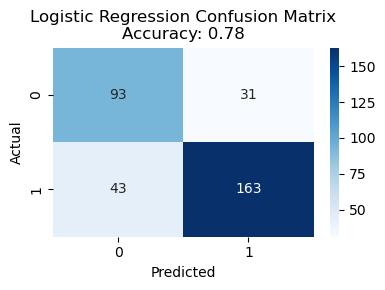

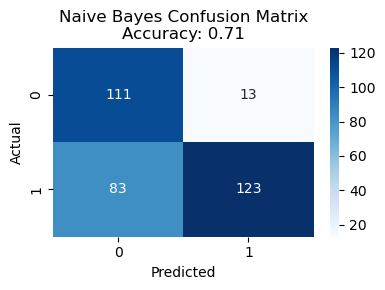

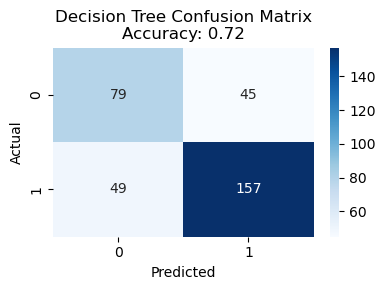

In [12]:
# Step 10: Visualize confusion matrices
for model_name, data in results.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(data["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix\nAccuracy: {data['Accuracy']:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [13]:
# Comparison of all three models

from sklearn.metrics import classification_report

# Logistic Regression results
print("=== Logistic Regression ===")
print("Confusion Matrix:")
print(results["Logistic Regression"]["Confusion Matrix"])
print(f"Accuracy: {results['Logistic Regression']['Accuracy']:.2f}")
print(classification_report(y_test, pred_logreg), "\n")

# Naive Bayes results
print("=== Naive Bayes ===")
print("Confusion Matrix:")
print(results["Naive Bayes"]["Confusion Matrix"])
print(f"Accuracy: {results['Naive Bayes']['Accuracy']:.2f}")
print(classification_report(y_test, pred_nb), "\n")


=== Logistic Regression ===
Confusion Matrix:
[[ 93  31]
 [ 43 163]]
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.68      0.75      0.72       124
           1       0.84      0.79      0.81       206

    accuracy                           0.78       330
   macro avg       0.76      0.77      0.77       330
weighted avg       0.78      0.78      0.78       330
 

=== Naive Bayes ===
Confusion Matrix:
[[111  13]
 [ 83 123]]
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       124
           1       0.90      0.60      0.72       206

    accuracy                           0.71       330
   macro avg       0.74      0.75      0.71       330
weighted avg       0.78      0.71      0.71       330
 



In [14]:
# Decision Tree results
print("=== Decision Tree ===")
print("Confusion Matrix:")
print(results["Decision Tree"]["Confusion Matrix"])
print(f"Accuracy: {results['Decision Tree']['Accuracy']:.2f}")
print(classification_report(y_test, pred_dt), "\n")


=== Decision Tree ===
Confusion Matrix:
[[ 79  45]
 [ 49 157]]
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       124
           1       0.78      0.76      0.77       206

    accuracy                           0.72       330
   macro avg       0.70      0.70      0.70       330
weighted avg       0.72      0.72      0.72       330
 



Cleaned & Scaled Training Data Sample:
   popularity  vote_average  vote_count   runtime    budget
0    2.047117     -1.269567   -0.336543  0.585827 -0.208005
1    1.208387      1.165925    3.175018  1.255343  0.866439
2    0.087910     -0.305707    0.301592  0.627672  1.852572
3    0.008109      1.452757   -0.584663 -0.460292 -0.723149
4    0.677464      0.103869    0.776465 -0.209224  1.852572


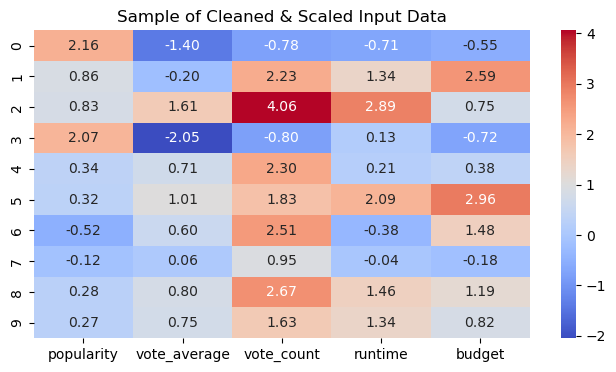

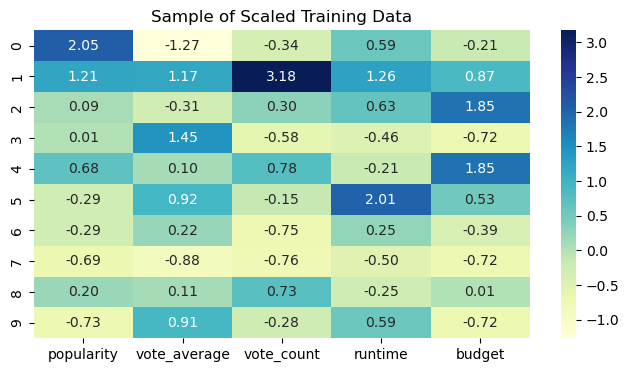

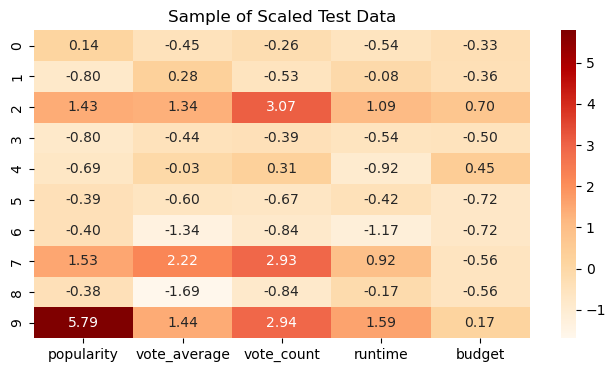

In [15]:
# Create binary label: 1 if revenue > budget, else 0
df['success'] = (df['revenue'] > df['budget']).astype(int)

# Select numerical features
features = ['popularity', 'vote_average', 'vote_count', 'runtime', 'budget']
X = df[features]
y = df['success']

# Fill missing values
X_cleaned = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Convert arrays back to DataFrames for display
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

# Display a sample of the cleaned and scaled training data
print("Cleaned & Scaled Training Data Sample:")
print(X_train_df.head())


# Plot sample of cleaned and scaled input data
plt.figure(figsize=(8, 4))
sns.heatmap(X_scaled_df.head(10), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sample of Cleaned & Scaled Input Data")
plt.show()

# Plot sample of training data
plt.figure(figsize=(8, 4))
sns.heatmap(X_train_df.head(10), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Sample of Scaled Training Data")
plt.show()

# Plot sample of test data
plt.figure(figsize=(8, 4))
sns.heatmap(X_test_df.head(10), annot=True, fmt=".2f", cmap="OrRd")
plt.title("Sample of Scaled Test Data")
plt.show()
